In [2]:
import matplotlib
import matplotlib.pyplot as plt
import os
import statistics

In [6]:
def read_all_steps(test, source, rep):
    step = 0
    steps = []
    while True:
        file_name = '../workdir/output/' + test + '_' + source + '_' + str(rep) + '_' + str(step) + '.log'
        if not os.path.exists(file_name):
            return steps
        step_data = []
        with open(file_name) as f:
            next(f)
            for line in f:
                cols = line.strip().split()
                step_data.append((float(cols[0]), float(cols[1]), float(cols[2])))
        steps.append(step_data)
        step += 1

def read_all_reps(test, source):
    reps = []
    rep = 0
    while True:
        rep_data = read_all_steps(test, source, rep)
        if len(rep_data) == 0:
            return reps
        reps.append(rep_data)
        rep += 1

with open('../workdir/output/comparison.txt') as f:
    comparisons = {}
    for line in f:
        (test, source, time, _, _) = line.strip().split('\t')
        reps = read_all_reps(test, source)
        if test not in comparisons:
            comparisons[test] = {}
        if source not in comparisons[test]:
            comparisons[test][source] = []
        comparisons[test][source] = reps
    for test, comparison in comparisons.items():
        maxtime = 0
        maxcpu = 0
        maxmem = 0
        for source,reps in comparison.items():
            for rep in reps:
                for step in rep:
                    maxtime = max(maxtime, max(s[0] for s in step))
                    maxcpu = max(maxcpu, max(s[1] for s in step))
                    maxmem = max(maxmem, max(s[2] for s in step))
        maxcpu = maxcpu * 1.1
        maxmem = maxmem * 1.1
        for source,reps in comparison.items():
            print(test, source)
            for i,rep in enumerate(reps):
                # No current benchmarks with multiple steps
                step_0 = rep[0]
                outfile = '../workdir/output/plots/' + test + '_' + source + '_' + str(i) + '.png'
                os.makedirs(os.path.dirname(outfile), exist_ok=True)
                fig,ax1 = plt.subplots()
                color = 'tab:blue'
                ax1.set_xlabel('time (s)')
                ax1.set_xlim(0, maxtime)
                ax1.set_ylabel('CPU (%)', color=color)
                ax1.set_ylim(0, maxcpu)
                ax1.plot(list(d[0] for d in step_0), list(d[1] for d in step_0), color=color)
                ax2 = ax1.twinx()
                color = 'tab:red'
                ax2.set_ylabel('Memory (MB)', color=color)
                ax2.set_ylim(0, maxmem)
                ax2.plot(list(d[0] for d in step_0), list(d[2] for d in step_0), color=color)
                fig.savefig(outfile)
                fig.suptitle(f'{test}-{source}-{i}')

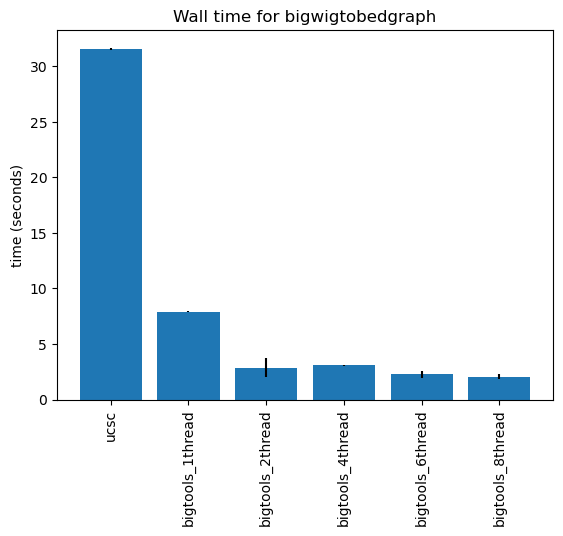

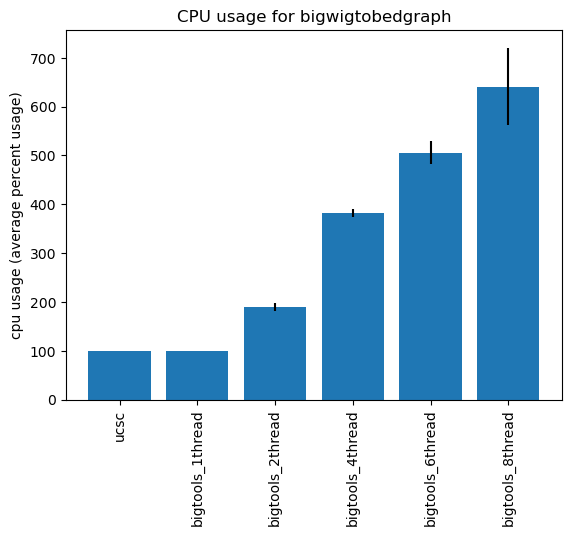

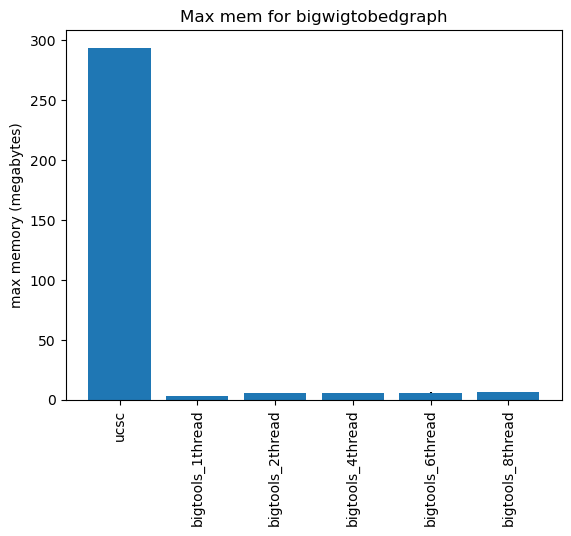

In [5]:
os.makedirs('../workdir/output/plots/bars/', exist_ok=True)
with open('../workdir/output/comparison.txt') as f:
    comparisons = {}
    for line in f:
        (test, source, time, cpu, maxmem) = line.strip().split('\t')
        if test not in comparisons:
            comparisons[test] = {}
        if source not in comparisons[test]:
            comparisons[test][source] = []
        comparisons[test][source].append((time, cpu, maxmem))
    for test, data in comparisons.items():
        sources = []
        wall_time_means = []
        wall_time_stds = []
        cpu_usage_means = []
        cpu_usage_stds = []
        max_mem_means = []
        max_mem_stds = []
        for source, reps in data.items():
            sources.append(source)
            wall_time = [float(d[0]) for d in reps]
            cpu_usage = [int(d[1]) for d in reps]
            max_mem = [float(d[2])/1000 for d in reps]
            wall_time_means.append(round(statistics.mean(wall_time), 3))
            wall_time_stds.append(round(statistics.stdev(wall_time), 3))
            cpu_usage_means.append(round(statistics.mean(cpu_usage), 3))
            cpu_usage_stds.append(round(statistics.stdev(cpu_usage), 3))
            max_mem_means.append(round(statistics.mean(max_mem), 3))
            max_mem_stds.append(round(statistics.stdev(max_mem), 3))
        plt.title(f"Wall time for {test}")
        plt.bar(range(len(sources)), wall_time_means, yerr=wall_time_stds)
        plt.xticks(range(len(sources)), sources, rotation=90)
        plt.ylabel('time (seconds)')
        plt.savefig(f'../workdir/output/plots/bars/{test}_wall_time.png')
        plt.show()
        plt.close()
        plt.title(f"CPU usage for {test}")
        plt.bar(range(len(sources)), cpu_usage_means, yerr=cpu_usage_stds)
        plt.xticks(range(len(sources)), sources, rotation=90)
        plt.ylabel('cpu usage (average percent usage)')
        plt.savefig(f'../workdir/output/plots/bars/{test}_cpu_usage.png')
        plt.show()
        plt.close()
        plt.title(f"Max mem for {test}")
        plt.bar(range(len(sources)), max_mem_means, yerr=max_mem_stds)
        plt.xticks(range(len(sources)), sources, rotation=90)
        plt.ylabel('max memory (megabytes)')
        plt.savefig(f'../workdir/output/plots/bars/{test}_max_mem.png')
        plt.show()
        plt.close()
        continue